# (Ford GoBike System Data)¶
 by Bashayer Alshehri (1 Aug, 2020)

## Investigation Overview

> The goal for  this project is to investigate the interest of the main features in Ford GoBike System Dataset.

## Dataset Overview

> This data include about '1863721' records and 15 features.
The feature are :
- duration_sec----->int64
- start_time----->object
- end_time----->object
- start_station_id----->float64
- start_station_name----->object
- start_station_latitude----->float64
- start_station_longitude----->float64
- end_station_id----->float64
- end_station_name----->object
- end_station_latitude----->float64
- end_station_longitude----->float64
- bike_id----->int64
- user_type----->object
- bike_share_for_all_trip----->object
- Month----->object
Most variables numeric (int,float),but the variables 'start_time','end_time','start_station_name','end_station_name' ,'user_type','bike_share_for_all_trip','Month' are string.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime as dt

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df_Jan = pd.read_csv('201801-fordgobike-tripdata.csv')
df_Feb = pd.read_csv('201802-fordgobike-tripdata.csv')
df_Mar = pd.read_csv('201803-fordgobike-tripdata.csv')
df_Apr = pd.read_csv('201804-fordgobike-tripdata.csv')
df_May = pd.read_csv('201805-fordgobike-tripdata.csv')
df_Jun = pd.read_csv('201806-fordgobike-tripdata.csv')
df_Jul = pd.read_csv('201807-fordgobike-tripdata.csv')
df_Aug = pd.read_csv('201808-fordgobike-tripdata.csv')
df_Sep = pd.read_csv('201809-fordgobike-tripdata.csv')
df_Oct = pd.read_csv('201810-fordgobike-tripdata.csv')
df_Nov = pd.read_csv('201811-fordgobike-tripdata.csv')
df_Dec = pd.read_csv('201812-fordgobike-tripdata.csv')

#add month coloumn to contact all dataset
df_Jan['Month']='Jan';
df_Feb['Month']='Feb';
df_Mar['Month']='Mar';
df_Apr['Month']='Apr';
df_May['Month']='May';
df_Jun['Month']='Jun';
df_Jul['Month']='Jul';
df_Aug['Month']='Aug';
df_Sep['Month']='Sep';
df_Oct['Month']='Oct';
df_Nov['Month']='Nov';
df_Dec['Month']='Dec';

# Merge all the datasets together
df = pd.concat([df_Jan,df_Feb,df_Mar,df_Apr,df_May,df_Jun,df_Jul,df_Aug,df_Sep,df_Oct,df_Nov,df_Dec])

## (Visualization 1)

> It seems that oct is the most month that people use bikes, the lowest month is jan.

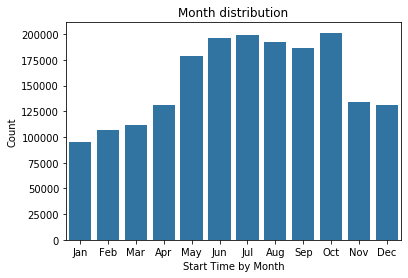

In [3]:
base_color = sb.color_palette()[0]
sb.countplot(data=df, x='Month', color=base_color)
plt.xlabel('Start Time by Month')
plt.ylabel('Count')
plt.title('Month distribution');

## (Visualization 2)

> It seems that the Subscriber is the most frequent.

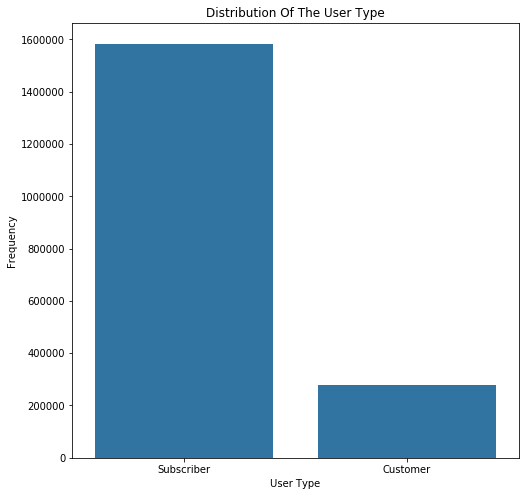

In [4]:
plt.figure(figsize = [8, 8])
base_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'user_type', color = base_color);
plt.title("Distribution Of The User Type")
plt.xlabel("User Type")
plt.ylabel("Frequency")
plt.show();

## (Visualization 3)

- There was a constant limit throughout the year and it was about 15,000 seconds.
- June and July had the longest trips during those months.
- November and December had fewer trips that lasted as long.

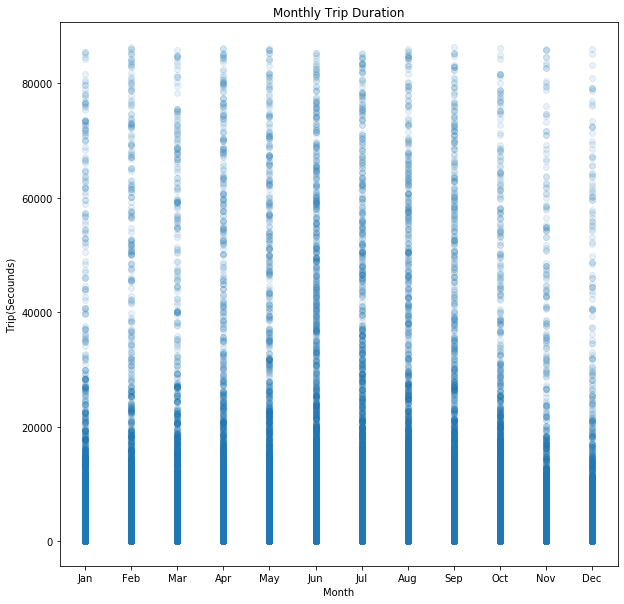

In [5]:
plt.figure(figsize = [10,10])
plt.scatter(data = df , x = 'Month' , y = 'duration_sec' , alpha = 0.1 )
plt.title('Monthly Trip Duration')
plt.xlabel('Month')
plt.ylabel('Trip(Secounds)');

## (Visualization 4)

- Almost all of the seasons were close to each other and most of the trips reached 24 mins.

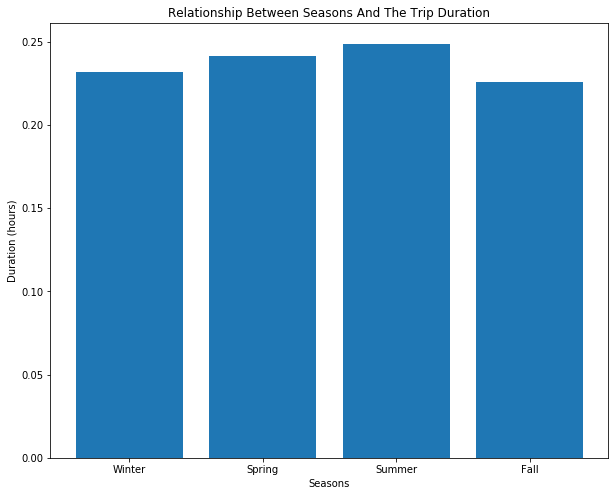

In [6]:
df['duration_hours'] = df['duration_sec'] / 3600

winter = df.query('Month in ["Dec" , "Jan" , "Feb"]' ).duration_hours.mean()
spring = df.query('Month in ["Mar" , "Apr" , "May"]' ).duration_hours.mean ()
summer = df.query('Month in ["Jun" , "Jul" , "Aug"] ').duration_hours.mean()
fall = df.query('Month in ["Sep" , "Nov" , "Dec"] ').duration_hours.mean()

plt.figure(figsize=[10,8])
plt.bar(['Winter','Spring','Summer','Fall'],[winter , spring , summer , fall] )
plt.title("Relationship Between Seasons And The Trip Duration")
plt.xlabel("Seasons")
plt.ylabel("Duration (hours)");

## (Visualization 5)

- The customer through all of the months has longer trips duration than subscriber

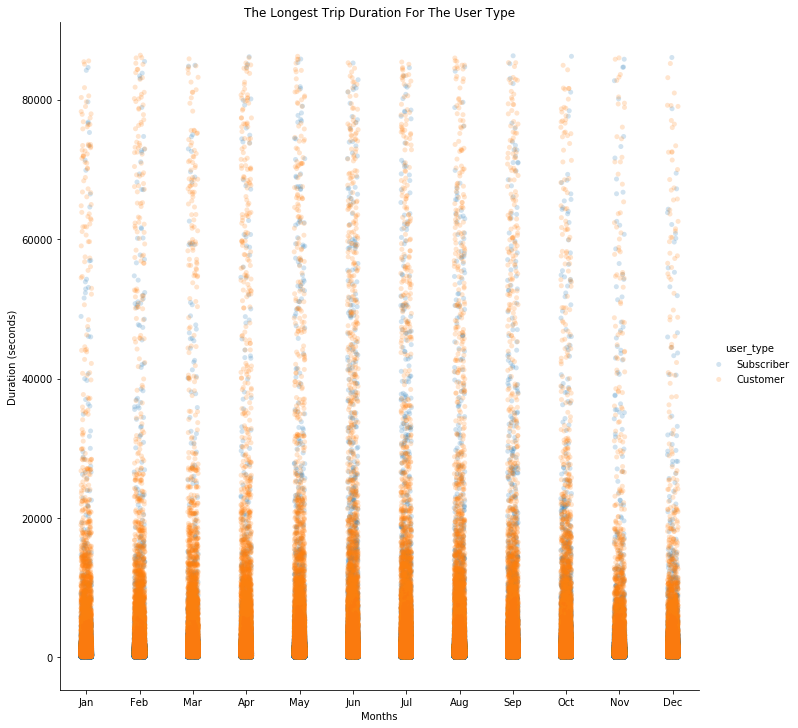

In [7]:
lo = sb.FacetGrid(data =  df, hue = 'user_type', height = 10)
lo.map(sb.stripplot, 'Month','duration_sec', alpha = 1/5 )
lo.add_legend();
plt.title("The Longest Trip Duration For The User Type")
plt.xlabel("Months")
plt.ylabel("Duration (seconds)");